In [ ]:
import pandas as pd
import os
from collections import OrderedDict
s_key1 = 'currentJob'
s_key2 = 'job'

def search_in_both(df, regex_str, regex, case=False, na=False):
  return df[(df[s_key1].str.contains(regex_str, regex=True, case=False, na=False))
          | (df[s_key2].str.contains(regex_str, regex=True, case=False, na=False))]

## regex
base = r'^{}'
expr = '(?=.*{})'

info = OrderedDict()
df = pd.read_csv('/content/deepmind_employee_directory.csv')
info['Total'] = df

info['Engineers'] = search_in_both(df, 'engineer', regex=False)
info['Scientists'] = search_in_both(df, 'scientist', regex=False)

words = ['engineer', 'research']
regex_str = base.format(''.join(expr.format(w) for w in words))
info['Research Engineers'] = search_in_both(df, regex_str, regex=True)

words = ['engineer', 'software']
regex_str = base.format(''.join(expr.format(w) for w in words))
info['Software Engineers'] = search_in_both(df, regex_str, regex=True)

info['Others'] = df[(~(df[s_key1].str.contains('engineer|scientist', regex=True, case=False, na=True)))
                  & (~(df[s_key2].str.contains('engineer|scientist', regex=True, case=False, na=True)))]

info['Unavailable'] = df[(df[s_key1].isna()) & (df[s_key2].isna())]

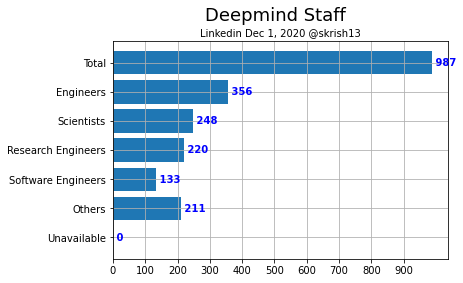

In [113]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(info.keys())
values = [len(info[label]) for label in labels]

fig, ax = plt.subplots()
ax.barh(labels, values)
ax.grid(zorder=0)
for i, v in enumerate(values):
    ax.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

plt.gca().invert_yaxis()
ax.set_xticks(range(0,len(info['Total']), 100))

title_string = "Deepmind Staff"
subtitle_string = "Linkedin Dec 1, 2020 @skrish13"

plt.suptitle(title_string, y=1.0, fontsize=18)
plt.title(subtitle_string, fontsize=10)
plt.show()